In [1]:
# Import packages
import pandas as pd
import numpy as np
import math
import time

import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

from hyperopt import *
import pyspark 
import mlflow

import seaborn as sns

import warnings

In [2]:
# Import Data
train = pd.read_csv("..\\Predictive Models\\Datasets\\17MinMaxSMOTE_0.75_newlabel.csv", delimiter=',')
test = pd.read_csv("..\\Predictive Models\\Datasets\\172MinMax_newlabel.csv", delimiter=',')
validation = pd.read_csv("..\\Predictive Models\\Datasets\\18MinMax_newlabel.csv", delimiter=',')
validation2 = pd.read_csv("..\\Predictive Models\\Datasets\\19MinMax_newlabel.csv", delimiter=',')

# Define X and y
X_train = (train.drop(labels=["label"], axis=1))
y_train = train[["label"]]
X_test = test.drop(labels=["label","c28992r100"], axis=1)
y_test =test[["label"]]

X_val1 = validation.drop(labels=["label","c28992r100"], axis=1)
y_val1 = validation[["label"]]
X_val2 = validation2.drop(labels=["label","c28992r100"], axis=1)
y_val2 = validation2[["label"]]

# Make column list
columns = X_train.columns

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Define hyperopt settings

In [3]:
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()
# Define objectives
def objective(params):
    classifier_type = params['type']
    del params['type']
    if classifier_type == 'XGB':
        clf = xgb.XGBClassifier(**params,
                                eval_metric='auc')
    else:
        return 0
    classifier = clf
    print(classifier)
    classifier.fit(X_train, y_train)
    pr_xgb = classifier.predict(X_train)
    accuracy = accuracy_score(y_train,pr_xgb)
    f1 = f1_score(y_train,pr_xgb)
    recall = recall_score(y_train,pr_xgb)
    print(accuracy, f1, recall)

    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define search space
space = hp.choice('classifier_type', [
        {
        "type": 'XGB',
        'eta':hp.choice('eta',np.arange(0.01,0.5,0.05)),
        'max_depth':hp.choice('max_depth',range(2,15)),
        'min_child_weight':hp.choice('min_child_weight',range(1,15)),
        'max_leaves':hp.choice('max_leaves',range(2,15)),
        'subsample':hp.choice('subsample', np.arange(0.1, 0.5, 0.05))}
])
    
with mlflow.start_run():
    best = fmin(
    fn=objective, 
    space=space,
    algo=tpe.suggest,
    max_evals=30, 
    verbose = 1,
    return_argmin=False)
    
print("--- %s seconds ---" % (time.time() - start_time))

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,                                                                                              
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.26, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=6,
              max_leaves=3, min_child_weight=10, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=0.40000000000000013, tree_method=None,
              validate_parameters=None, ...)
0.978253928274653                                                                                                                                                 
0

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,                                                                                              
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.36000000000000004,
              eval_metric='auc', gamma=None, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=11, max_leaves=14,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None,
              subsample=0.45000000000000007, tree_method=None,
              validate_parameters=None, ...)
0.981185136118708                                                                                                                     

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,                                                                                              
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.46, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=10,
              max_leaves=2, min_child_weight=11, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=0.45000000000000007, tree_method=None,
              validate_parameters=None, ...)
0.9795965721923967                                                                                                                                                


0.9786783386120196                                                                                                                                                
0.9744942623359185                                                                                                                                                
0.9504067598959731                                                                                                                                                
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,                                                                                              
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.21000000000000002,
              eval_metric='auc', gamma=None, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=11, max_leaves=11,
              m

0.947026053638327                                                                                                                                                 
0.9341491855858431                                                                                                                                                
0.8767272256106026                                                                                                                                                
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,                                                                                              
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.11, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=13,
              max_leaves=8, min_child_weight=1, missing=nan

In [4]:
# Results
print(best)

{'eta': 0.21000000000000002, 'max_depth': 12, 'max_leaves': 8, 'min_child_weight': 1, 'subsample': 0.40000000000000013, 'type': 'XGB'}


In [5]:
# Fitting Randomforest to the Training set
classifier = xgb.XGBClassifier(eta = best['eta'],
                            max_depth = best['max_depth'],
                            min_child_weight = int(best['min_child_weight']),
                            max_leaves= int(best['max_leaves']),
                            subsample = best['subsample'],
                           n_jobs = -1,)
classifier.fit(X_train, y_train)
pr_xgb = classifier.predict(X_train)
accuracy = accuracy_score(y_train,pr_xgb)
f1 = f1_score(y_train,pr_xgb)
recall = recall_score(y_train,pr_xgb)
print(accuracy, f1, recall)
print(roc_auc_score(y_train, classifier.predict_proba(X_train)[:, 1]))

[05:07:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9817920032366246 0.9782964831366912 0.9575239011929773
0.9989657589230205


# Results

Accuracy:0.03497444175410277
F1:0.056300973428045256
Recall:1.0


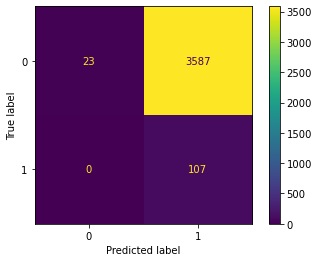

Accuracy:0.047713363627532465
F1:0.06542694617755793
Recall:0.9844596748485814


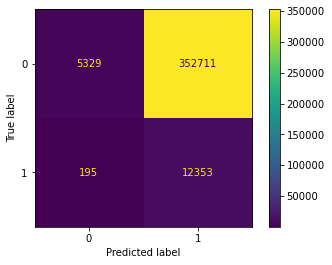

Accuracy:0.02271016985594496
F1:0.04085271604091602
Recall:0.9981954111884507


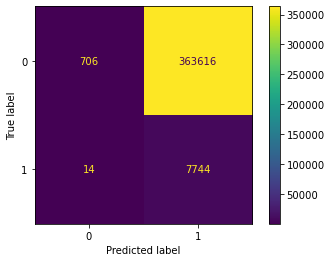

In [6]:
# Make confusion matrixes, accuracy, recall and f1 score for testset
p_xgb = classifier.predict(X_test)
print("Accuracy:" + str(classifier.score(X_test, y_test)))
print("F1:" + str(f1_score(y_test,p_xgb)))
print("Recall:" + str(recall_score(y_test,p_xgb)))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,p_xgb),display_labels=classifier.classes_).plot()
plt.savefig('con_test_xgb_MM_smote.png', dpi=300)
plt.show()

# Make confusion matrixes, accuracy, recall and f1 score for validationset 1
pre_xgb = classifier.predict(X_val1)
print("Accuracy:" + str(classifier.score(X_val1, y_val1)))
print("F1:" + str(f1_score(y_val1,pre_xgb)))
print("Recall:" + str(recall_score(y_val1,pre_xgb)))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val1,pre_xgb),display_labels=classifier.classes_).plot()
plt.savefig('con_val_xgb_MM_smote.png', dpi=300)
plt.show()


# Make confusion matrixes, accuracy, recall and f1 score for validationset 2
pred_xgb = classifier.predict(X_val2)
print("Accuracy:" + str(classifier.score(X_val2, y_val2)))
print("F1:" + str(f1_score(y_val2, pred_xgb)))
print("Recall:" + str(recall_score(y_val2, pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val2, pred_xgb),display_labels=classifier.classes_).plot()
plt.savefig('con_val2_xgb_MM_smote.png', dpi=300)
plt.show()

In [7]:
print(roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_val1, classifier.predict_proba(X_val1)[:, 1]))
print(roc_auc_score(y_val2, classifier.predict_proba(X_val2)[:, 1]))

0.5185712066689103
0.4975382010456676
0.48531723427099754


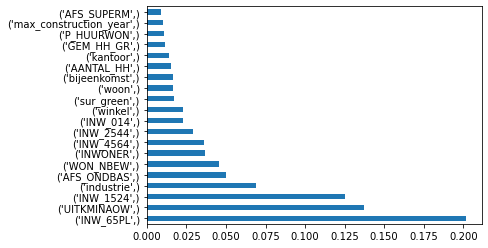

In [8]:
# Create feature importance plot
feat_importances = pd.Series(classifier.feature_importances_, index=columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.savefig('import_xgb_MM_smote.png', dpi=300, bbox_inches = "tight")

# Make QGIS File

In [9]:
# Create Dataframe with TP, TN, FP, FN and gridnumber
qgis_koppel_train = []
qgis_koppel_test = []
qgis_koppel_val1 = []
qgis_koppel_val2 = []
qgis_train = pd.DataFrame(train.index,columns=["id"])
qgis_test = pd.DataFrame(test.index,columns=["id"])
qgis_val1 = pd.DataFrame(validation["c28992r100"],columns=["c28992r100"])
qgis_val2 = pd.DataFrame(validation2["c28992r100"],columns=["c28992r100"])

for y, yt in zip(y_train, pr_xgb):
    if y == 0 and yt == 0:
        qgis_koppel_train.append("TN")
    if y == 0 and yt == 1:
        qgis_koppel_train.append("FN")
    if y == 1 and yt == 0:
        qgis_koppel_train.append("FP")
    if y == 1 and yt == 1:
        qgis_koppel_train.append("TP")

for y, yt in zip(y_test.to_numpy(), p_xgb):
    if y == 0 and yt == 0:
        qgis_koppel_test.append("TN")
    if y == 0 and yt == 1:
        qgis_koppel_test.append("FN")
    if y == 1 and yt == 0:
        qgis_koppel_test.append("FP")
    if y == 1 and yt == 1:
        qgis_koppel_test.append("TP")
        
for y, yt in zip(y_val1.to_numpy(), pre_xgb):
    if y == 0 and yt == 0:
        qgis_koppel_val1.append("TN")
    if y == 0 and yt == 1:
        qgis_koppel_val1.append("FN")
    if y == 1 and yt == 0:
        qgis_koppel_val1.append("FP")
    if y == 1 and yt == 1:
        qgis_koppel_val1.append("TP")

for y, yt in zip(y_val2.to_numpy(), pred_xgb):
    if y == 0 and yt == 0:
        qgis_koppel_val2.append("TN")
    if y == 0 and yt == 1:
        qgis_koppel_val2.append("FN")
    if y == 1 and yt == 0:
        qgis_koppel_val2.append("FP")
    if y == 1 and yt == 1:
        qgis_koppel_val2.append("TP")

qgis_train["label"] = pd.Series(qgis_koppel_train)
qgis_test["label"] = pd.Series(qgis_koppel_test)
qgis_val1["label"] = pd.Series(qgis_koppel_val1)
qgis_val2["label"] = pd.Series(qgis_koppel_val2)

qgis_train.to_csv("qgistrainxgbSMM.csv", index=False)
qgis_test.to_csv("qgistestxgbSMM.csv", index=False)
qgis_val1.to_csv("qgisval1xgbSMM.csv", index=False)
qgis_val2.to_csv("qgisval2xgbSMM.csv", index=False)